# Task 2

# Import data

Import useful packages and source code:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import neural network
import sys
sys.path.insert(0, '../src')

from Task_2.activation_layer import ActivationLayer
from Task_2.adam_optimizer import AdamOptimizer
from Task_2.layer import Layer
from Task_2.neural_network import NeuralNetwork

Load data:

In [2]:
# Import data and targets
digits = load_digits()
X = digits.data  # type: ignore
y = digits.target  # type: ignore

# Apply StandardScaler to data
st = StandardScaler()
X = st.fit_transform(X)

# Split in train and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=65,train_size=0.8)

# Apply one-hot enconding to the training targets
y_train = to_categorical(y_train)

The dataset is composed by hand-written digits, each associated with theis real value. 

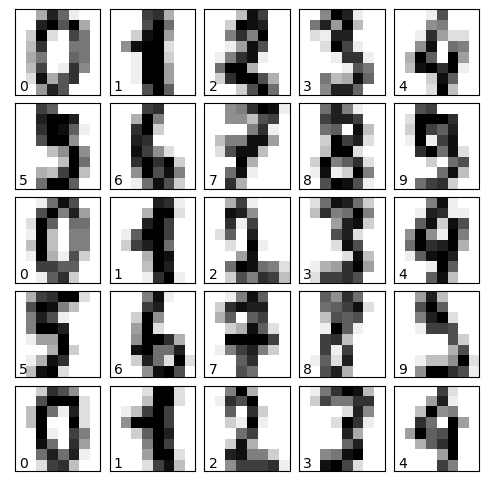

In [3]:
fig, axes = plt.subplots(5,5, figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):  # type: ignore
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')  # type: ignore
    ax.text(0.05, 0.05, str(digits.target[i]),  # type: ignore
            transform=ax.transAxes, color='black')

# Neural Networks

## First neural network

In [ ]:
cm = confusion_matrix(y,y_test, labels=["0","1","2","3","4","5","6","7","8","9"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["0","1","2","3","4","5","6","7","8","9"])
disp.plot()

The first evidence is about the lerning rate $\alpha$. In fact, it has been tested that a low learning rate is necessary in order to prevent the the loss the keep increasing

Learning rate: 0.0010 - Accuracy: 0.475
Learning rate: 0.0005 - Accuracy: 0.706
Learning rate: 0.0001 - Accuracy: 0.425


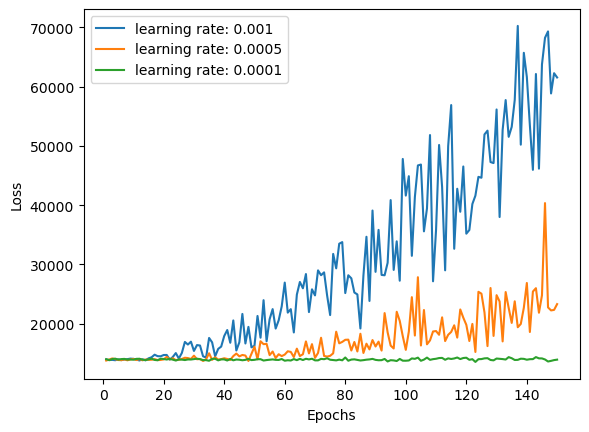

In [10]:
# Neural network with 1 hidden layer (30 nodes), sigmoid and softmax activation functions

# The learning rate tested are:
learning_rate_range = [0.001, 0.0005, 0.0001]

fig, ax = plt.subplots()

for lr in learning_rate_range:

    NN = NeuralNetwork(learning_rate = lr, max_epochs = 150, type_loss = "cross_entropy")
    NN.add(Layer(X.shape[1])) # Add input layer
    NN.add(Layer(30, dropout_percentile=0.5, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
    NN.add(Layer(y_train.shape[1], dropout_percentile=0.5, activation_function=ActivationLayer("softmax"))) # Add output layer
    NN.build_network()
    L = NN.fit_batch(X_train,y_train, toll = 0.001) # set toll as tollerance parameter to stop the search
    y_pred = NN.predict(X_test)

    y = np.argmax(y_pred,axis = 1)

    #print("Learning rate: %.4f - Accuracy: %.3f" %(lr,accuracy_score(y,y_test)))
    
    print("Learning rate: %.4f - Accuracy: %.3f" %(lr,accuracy_score(y,y_test)))

    ax.plot(range(1,len(L)+1),L, label="Learning rate: {}".format(lr))


ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");
ax.legend()

## Sensitivity to hyper-parameters

### Sensitivity to number of nodes

In [ ]:
nodes = [10,15,20,25,30,40,50,60,70,80,90,100]

print("====================================")
print("  1 HIDDEN LAYER NEURAL NETWORK     ")
print("____________________________________")
for test_nodes in nodes:
    
    acc_test = []
    
    for _ in range(5): # repeat 5 times
    
        NN = NeuralNetwork(learning_rate = 0.01, max_epochs = 100, type_loss = "cross_entropy")#,optimizer=AdamOptimizer())
        NN.add(Layer(X.shape[1])) # Add input layer
        NN.add(Layer(test_nodes, dropout_percentile=0.8, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
        NN.add(Layer(y_train.shape[1], dropout_percentile=0.3, activation_function=ActivationLayer("softmax"))) # Add output layer
        NN.build_network()

        L = NN.fit_mini_batch(X_train,y_train, toll = 0.001,n_mini_batches = 1)

        y_pred = NN.predict(X_test)

        y = np.argmax(y_pred,axis = 1)
        
        acc_test.append(accuracy_score(y,y_test))
        
    print("Number of nodes: %.0f, Accuracy: %.3f" %(test_nodes,np.mean(acc_test)))
print("====================================")  

### Number of mini-batches

In [ ]:
mini_batches = [1,5,10,20,30,40]

print("====================================")
print("  1 HIDDEN LAYER NEURAL NETWORK     ")
print("____________________________________")
for test_mini_batches in mini_batches:
    
    acc_test = []
    
    for _ in range(5): # repeat 5 times
        NN = NeuralNetwork(learning_rate = 0.01, max_epochs = 200, type_loss = "cross_entropy")#,optimizer=AdamOptimizer())
        NN.add(Layer(X.shape[1])) # Add input layer
        NN.add(Layer(80, dropout_percentile=0.8, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
        NN.add(Layer(y_train.shape[1], dropout_percentile=0.3, activation_function=ActivationLayer("softmax"))) # Add output layer
        NN.build_network()

        L = NN.fit_mini_batch(X_train,y_train, toll = 0.001,n_mini_batches = test_mini_batches) # set toll as tollerance parameter to stop the search

        y_pred = NN.predict(X_test)

        y = np.argmax(y_pred,axis = 1)
            
        acc_test.append(accuracy_score(y,y_test))

    print("Number of mini batches: %.0f, Accuracy: %.3f" %(test_mini_batches,np.mean(acc_test)))
print("====================================")

## Model tuning

## Final design

In [ ]:
acc = []
L_range = np.zeros((10,400))

for ind in range(10):

    NN = NeuralNetwork(learning_rate = 0.00003, max_epochs = 400, type_loss = "cross_entropy",optimizer=AdamOptimizer())
    NN.add(Layer(X.shape[1])) # Add input layer
    NN.add(Layer(30, dropout_percentile=0.8, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
    NN.add(Layer(y_train.shape[1], dropout_percentile=0.85, activation_function=ActivationLayer("softmax"))) # Add output layer
    NN.build_network()

    L = NN.fit_mini_batch(X_train,y_train, toll = 0.01, n_mini_batches = 10) # 10: set toll as tollerance parameter to stop the search

    y_pred = NN.predict(X_test)

    y = np.argmax(y_pred,axis = 1)
    
    acc.append(accuracy_score(y,y_test))
    L_range[ind] = L
    
print("Accuracy: %.3f" %np.mean(acc))

L_plot = np.mean(L_range,axis=0)
fig, ax = plt.subplots()
ax.plot(range(1,len(L_plot)+1),L_plot)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");

Improve accuracy:

In [ ]:
acc = []
epochs = 200
trials = 10

L_range = np.zeros((trials,epochs))

for ind in range(trials):

    NN = NeuralNetwork(learning_rate = 0.00003, max_epochs = epochs, type_loss = "cross_entropy",optimizer=AdamOptimizer())
    NN.add(Layer(X.shape[1])) # Add input layer
    NN.add(Layer(80, dropout_percentile=0.8, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
    #NN.add(Layer(15, dropout_percentile=0.1, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
    NN.add(Layer(y_train.shape[1], dropout_percentile=0.85, activation_function=ActivationLayer("softmax"))) # Add output layer
    NN.build_network()

    L = NN.fit_mini_batch(X_train,y_train, toll = 0.01, n_mini_batches = 10) # 10: set toll as tollerance parameter to stop the search

    y_pred = NN.predict(X_test)

    y = np.argmax(y_pred,axis = 1)
    
    acc.append(accuracy_score(y,y_test))
    L_range[ind] = L
    
print("Accuracy: %.3f" %np.mean(acc))

L_plot = np.mean(L_range,axis=0)
fig, ax = plt.subplots()
ax.plot(range(1,len(L_plot)+1),L_plot)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");